In [36]:
### import os
import numpy as np
import pickle
import torch
import random
from pathlib import Path
import torchio as tio
import os

## Set deterministic randomness
random_seed = 42
torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


def get_dataset(data_dir, transform=tio.Compose([])):
    files = os.listdir(data_dir)
    subjects = []
    for file in files:
        data_index = pickle.load(open(f"{data_dir}/{file}", 'rb'))
        

        mri = data_index['mri'][np.newaxis,:,:,:]
        print(np.max(mri))
        label = data_index['label'][np.newaxis,:,:,:]

        table = data_index['table']
        table_label = table[-5:].astype(float) #SNSB
        table_input = table[1:-5].astype(float) # The others, except ID,

        subject = tio.Subject(
            {                
                'mri':tio.ScalarImage(tensor=torch.from_numpy(mri)),
                'label':tio.LabelMap(tensor=torch.from_numpy(label)),
                'table_input':torch.from_numpy(table_input),
                'table_label':torch.from_numpy(table_label),
            }
        )
        subjects.append(subject)
    return tio.SubjectsDataset(subjects, load_getitem=False, transform=transform)        
        

#Test Dataset class working
# add transform: numpy->tensor, lrflip
from torchvision import transforms, datasets
dataset_train = get_dataset(data_dir='../data/ml_process/train', transform=tio.Compose(
            [
                tio.transforms.Resize(128),
            ]
        ))

print(dataset_train[0].mri.shape)


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
(1, 128, 128, 128)


In [ ]:
x = torch.tensor([1, 2, 3, 4])
x = x.unsqueeze(1).unsqueeze(2).unsqueeze(3)
print(x.shape)
x = x.squeeze(3).squeeze(2).squeeze(1)
print(x.shape, x)

In [ ]:
!nvidia-smi 

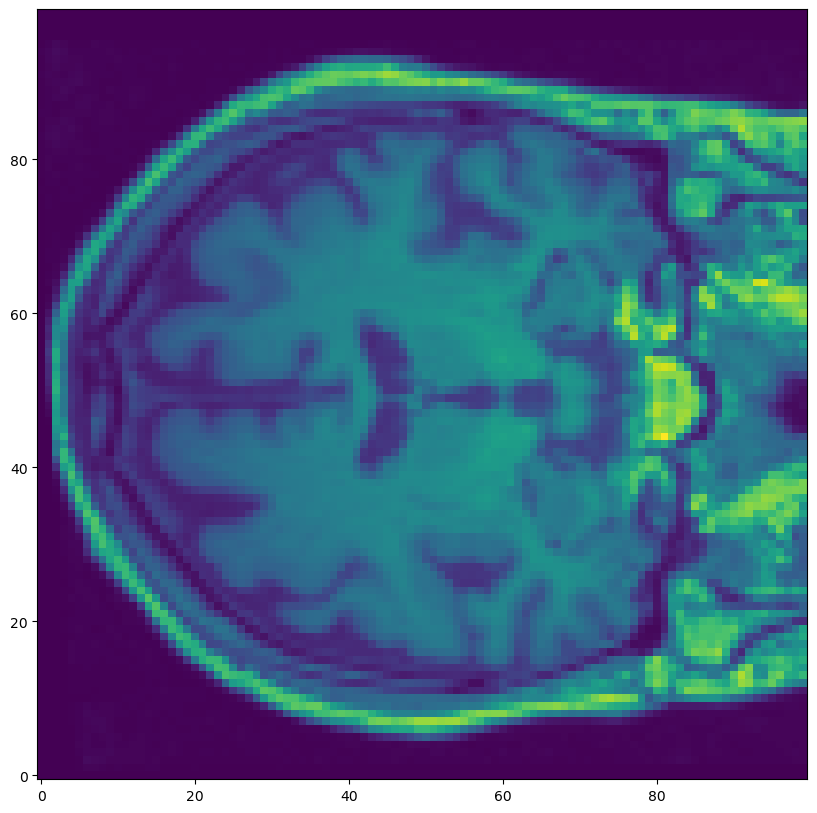

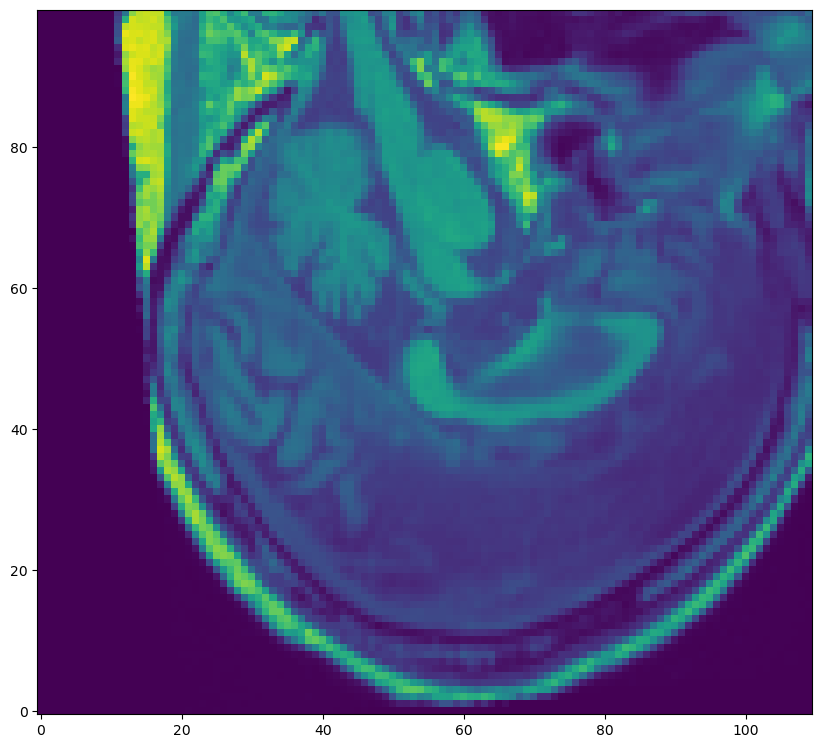

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.imshow((dataset_train[35].mri.data[0,15:115,10:110,64]), origin='lower')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow((dataset_train[35].mri.data[0,64,10:110,0:110]), origin='lower')
plt.show()


In [ ]:
!python train.py

  0%| | 0/100 [01:48<?, ?it/s, loss=0.17156, dice0=0.99378, dice1=0.85255, dice2epoch 2 end
[tensor(0.9864, device='cuda:0'), tensor(0.5584, device='cuda:0'), tensor(0.4107, device='cuda:0')] tensor(0.4500, device='cuda:0')
[tensor(0.9834, device='cuda:0'), tensor(0.5494, device='cuda:0'), tensor(0.3421, device='cuda:0')] tensor(0.4930, device='cuda:0')
[tensor(0.9772, device='cuda:0'), tensor(0.3713, device='cuda:0'), tensor(0.1743, device='cuda:0')] tensor(0.5850, device='cuda:0')
[tensor(0.9785, device='cuda:0'), tensor(0.5286, device='cuda:0'), tensor(0.3361, device='cuda:0')] tensor(0.5170, device='cuda:0')
[tensor(0.9872, device='cuda:0'), tensor(0.6100, device='cuda:0'), tensor(0.4513, device='cuda:0')] tensor(0.3864, device='cuda:0')

  0%| | 0/100 [01:54<?, ?it/s, loss=0.17156, dice0=0.99378, dice1=0.85255, dice2

  0%| | 0/100 [00:01<?, ?it/s, loss=0.15114, dice0=0.99824, dice1=0.84789, dice2
  0%| | 0/100 [00:02<?, ?it/s, loss=0.17709, dice0=0.99591, dice1=0.86254, dice2
  0